In [1]:
url = '/content/sample_data/anscombe.json'

In [2]:
# prompt: url을 읽고 데이터프레임으로 읽기

import pandas as pd
df = pd.read_json(url)
df

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
5,I,14,9.96
6,I,6,7.24
7,I,4,4.26
8,I,12,10.84
9,I,7,4.81


In [6]:
# prompt: Series별로 그룹핑 한후 상관관계와 분산, 단순회귀식을 구하고 시각화하라

import pandas as pd
import matplotlib.pyplot as plt

url = '/content/sample_data/anscombe.json'

df = pd.read_json(url)

# 그룹별로 분할
grouped_df = df.groupby('Series')

# 상관관계와 분산을 계산
correlations = grouped_df.corr()
variances = grouped_df.var()

# 단순회귀식을 계산
from sklearn.linear_model import LinearRegression

model = LinearRegression()

for series, data in grouped_df:
    print(series)
    display(data)

I


,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
5,I,14,9.96
6,I,6,7.24
7,I,4,4.26
8,I,12,10.84
9,I,7,4.81


II


,Series,X,Y
11,II,10,9.14
12,II,8,8.14
13,II,13,8.74
14,II,9,8.77
15,II,11,9.26
16,II,14,8.10
17,II,6,6.13
18,II,4,3.10
19,II,12,9.13
20,II,7,7.26


III


,Series,X,Y
22,III,10,7.46
23,III,8,6.77
24,III,13,12.74
25,III,9,7.11
26,III,11,7.81
27,III,14,8.84
28,III,6,6.08
29,III,4,5.39
30,III,12,8.15
31,III,7,6.42


IV


,Series,X,Y
33,IV,8,6.58
34,IV,8,5.76
35,IV,8,7.71
36,IV,8,8.84
37,IV,8,8.47
38,IV,8,7.04
39,IV,8,5.25
40,IV,19,12.50
41,IV,8,5.56
42,IV,8,7.91


Series I:
Correlation: 0.8161864542289101
Variance: 4.132640000000001
Regression line: y = 0.500x + 2.998


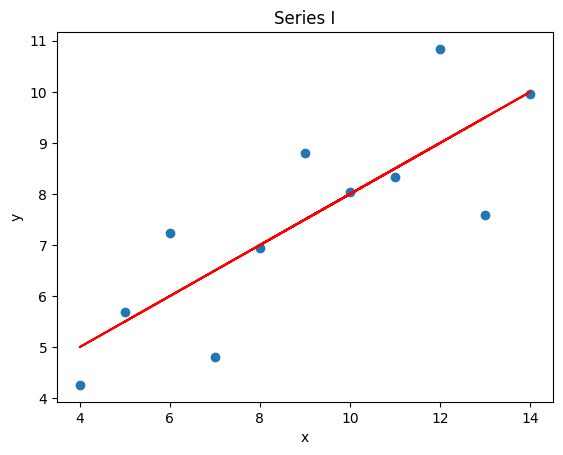

Series II:
Correlation: 0.8162365060002427
Variance: 4.127629090909092
Regression line: y = 0.500x + 3.001


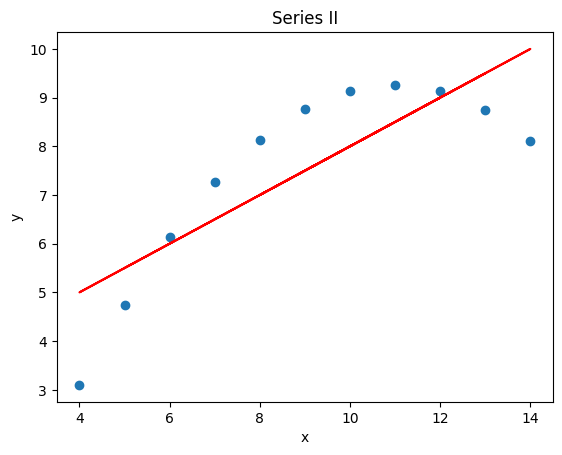

Series III:
Correlation: 0.8162867394895984
Variance: 4.12262
Regression line: y = 0.500x + 3.002


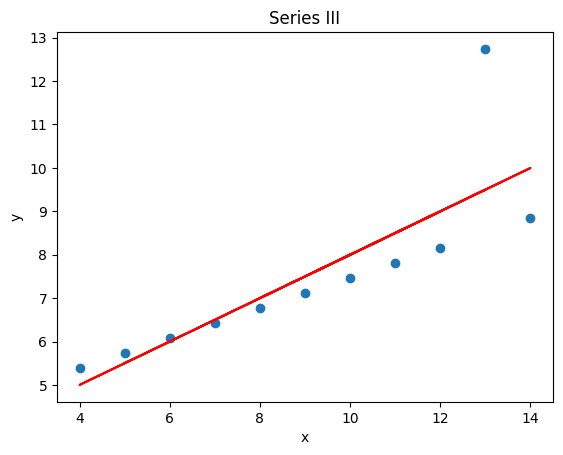

Series IV:
Correlation: 0.8165214368885028
Variance: 4.12324909090909
Regression line: y = 0.500x + 3.002


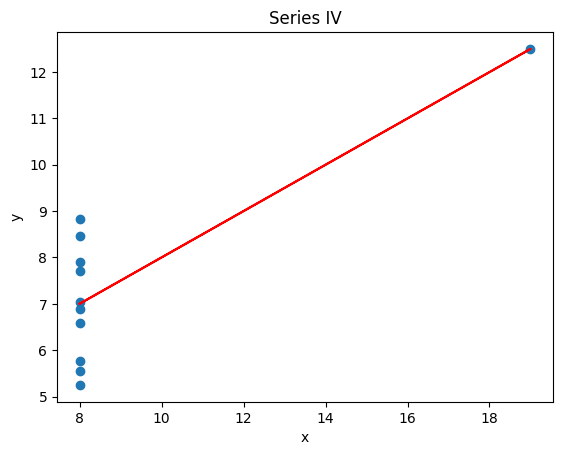

In [14]:
for series, data in grouped_df:
  X = data['X'].values.reshape(-1, 1)
  y = data['Y']
  model.fit(X, y)
  slope = model.coef_[0]
  intercept = model.intercept_
  print(f"Series {series}:")
  print(f"Correlation: {correlations.loc[series, 'X']['Y']}")
  print(f"Variance: {variances.loc[series, 'Y']}")
  print(f"Regression line: y = {slope:.3f}x + {intercept:.3f}")

  # 시각화
  plt.figure()
  plt.scatter(X, y)
  plt.plot(X, slope * X + intercept, color='red')
  plt.title(f"Series {series}")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()
